In [92]:
import numpy as np
from matplotlib import pyplot as plt
import csv

%matplotlib inline

import lib_ecofun as lef
from importlib import reload
reload(lef)
from scipy.optimize import curve_fit, minimize

# Recover old result

Plotting only data regarding investment on green power production (only part of what world bank considers green investment)
0.003408921792197812


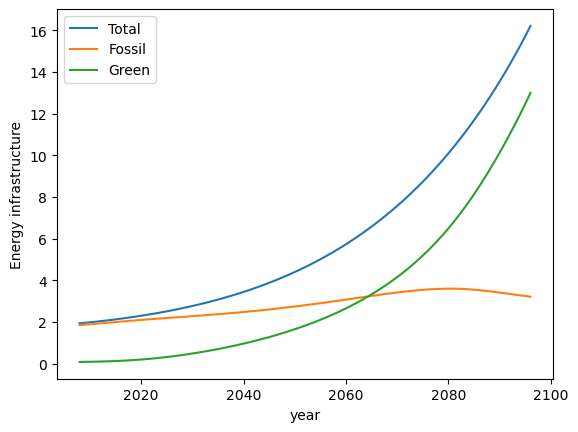

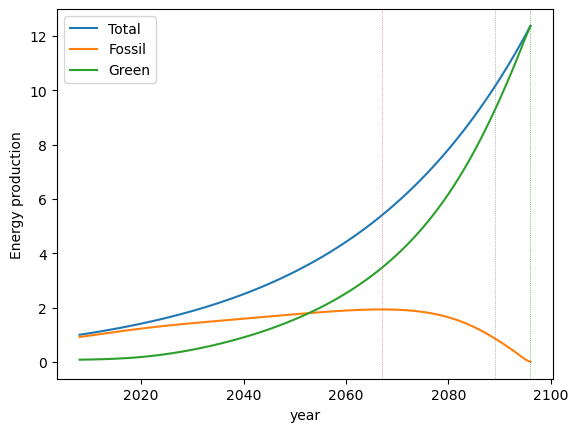

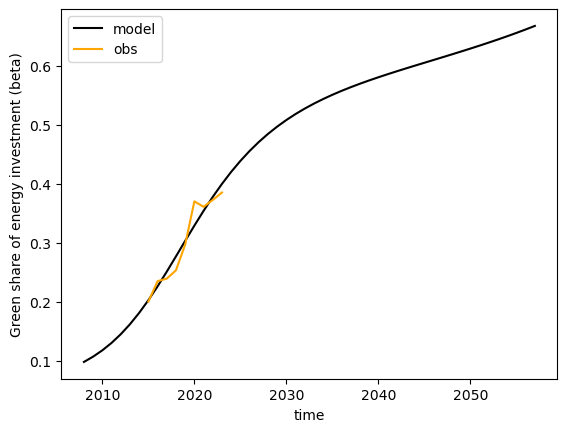

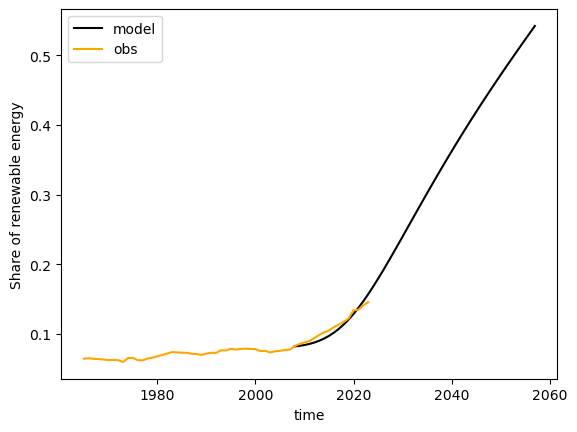

In [71]:
params = lef.default_params.copy()
params['growth'] = 0.029 # fixing Growth!

parnames = ['beta_0', 'r_inv', 'a', 'delta_sig']
oks = [-1.381e-01, 1.095e-01, 9.961e-01, 2.124e-01]

for par, parval in zip(parnames, oks):
    params[par] = parval

resu_old = lef.run_model(inicond = lef.inicond_yr(2008), params = params, n_iter = 100, verbose = False, rule = 'maxgreen', year_ini = 2008, extend_constant=False)
lef.plot_resu(resu_old, year_ini = 2008)
lef.plot_resuvsobs(resu_old, year_ini = 2008)

obs = dict()
obs['Ig_ratio'] = lef.Ig_obs/(lef.Ig_obs+lef.If_obs)
obs['Eg_ratio'] = lef.Eg_ratio
cost = lef.costfun(resu_old, obs)#, weights = weights)
print(cost)


# Starting point of minimize

Plotting only data regarding investment on green power production (only part of what world bank considers green investment)
1.8427727164959056


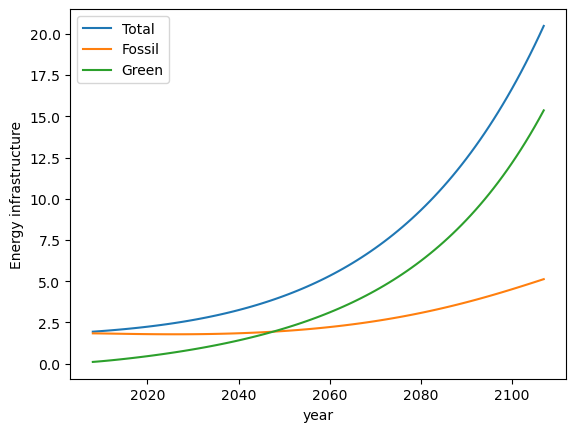

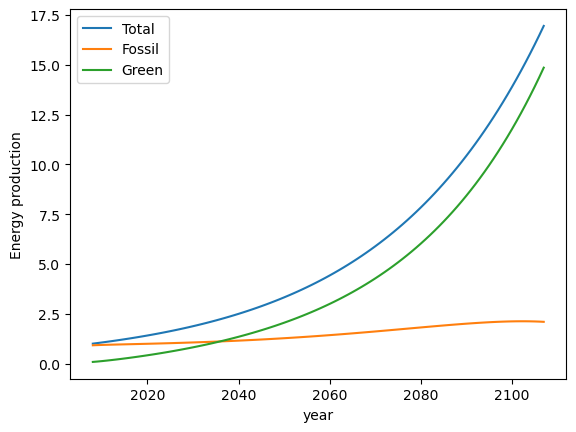

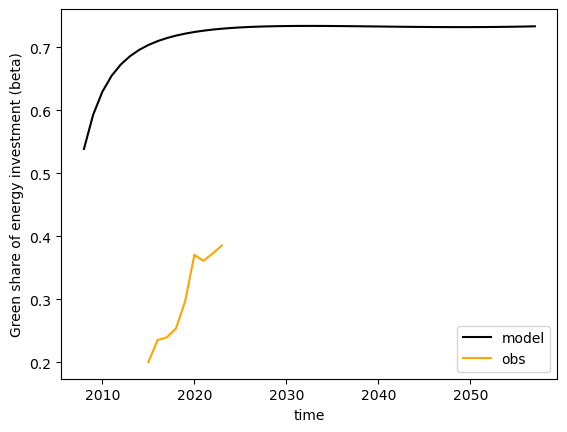

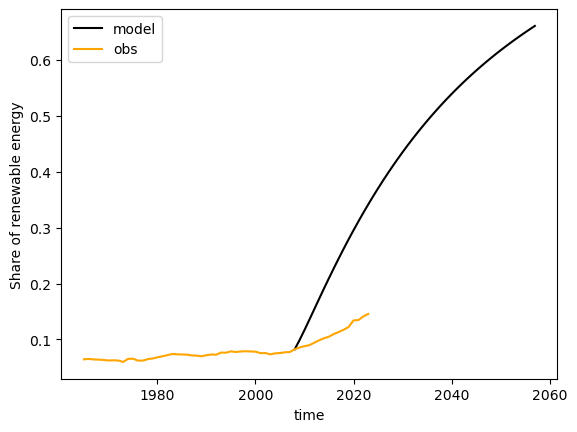

In [75]:
params = lef.default_params.copy()
params['growth'] = 0.029 # fixing Growth!

parnames = ['beta_0', 'r_inv', 'a', 'delta_sig']
#oks = [-1.381e-01, 1.095e-01, 9.961e-01, 2.124e-01]
oks = [0.2, 0.1, 1., 0.7]

for par, parval in zip(parnames, oks):
    params[par] = parval

resu = lef.run_model(inicond = lef.inicond_yr(2008), params = params, n_iter = 100, verbose = False, rule = 'maxgreen', year_ini = 2008, extend_constant=False)
lef.plot_resu(resu, year_ini = 2008)
lef.plot_resuvsobs(resu, year_ini = 2008)

obs = dict()
obs['Ig_ratio'] = lef.Ig_obs/(lef.Ig_obs+lef.If_obs)
obs['Eg_ratio'] = lef.Eg_ratio
cost = lef.costfun(resu, obs)#, weights = weights)
print(cost)

## Best fit with obs. Ig_ratio (2015-2023) and Eg_ratio (2008-2023). 2008 starting point (could be earlier)

In [83]:
parnames = ['beta_0', 'r_inv', 'a', 'delta_sig']
initial_guess = [0.2, 0.1, 1., 0.7]#, 1.]
bounds = [(-0.5, 0.5), (0.01, 0.4), (0.5, 1.5), (0.01, 2.)]#, (0.5, 1.5)]

year_ini = 2000

params = lef.default_params.copy()
print(params)
print('-------------')
params['growth'] = 0.029 # fixing Growth!

# Step 5: Use an optimization function to find the best parameters
result = minimize(lef.cost_function, initial_guess, bounds = bounds, args = (parnames, params, year_ini, lef.inicond_yr(year_ini), False), tol = 1e-10)
print(result)

{'growth': 0.01, 'eps': 1, 'a': 1, 'b': 1, 'gamma_f': 0.5, 'gamma_g': 0.5, 'eta_g': 0.2, 'eta_f': 0.2, 'h_g': 0.5, 'h_f': 0.5, 'r_inv': 0.1, 'beta_0': 0.2, 'delta_sig': 0.5, 'delta_g': 0.01, 'delta_f': 0.01, 'f_heavy': 0.1}
-------------
---------------------
{'beta_0': 0.2, 'r_inv': 0.1, 'a': 1.0, 'delta_sig': 0.7}
---------------------
{'beta_0': 0.20000001, 'r_inv': 0.1, 'a': 1.0, 'delta_sig': 0.7}
---------------------
{'beta_0': 0.2, 'r_inv': 0.10000001, 'a': 1.0, 'delta_sig': 0.7}
---------------------
{'beta_0': 0.2, 'r_inv': 0.1, 'a': 1.00000001, 'delta_sig': 0.7}
---------------------
{'beta_0': 0.2, 'r_inv': 0.1, 'a': 1.0, 'delta_sig': 0.70000001}
---------------------
{'beta_0': -0.5, 'r_inv': 0.01, 'a': 0.5, 'delta_sig': 2.0}
Too short! extending up to 2025
---------------------
{'beta_0': -0.49999999, 'r_inv': 0.01, 'a': 0.5, 'delta_sig': 2.0}
Too short! extending up to 2025
---------------------
{'beta_0': -0.5, 'r_inv': 0.01000001, 'a': 0.5, 'delta_sig': 2.0}
Too short! 

Plotting only data regarding investment on green power production (only part of what world bank considers green investment)
0.003563988950251069


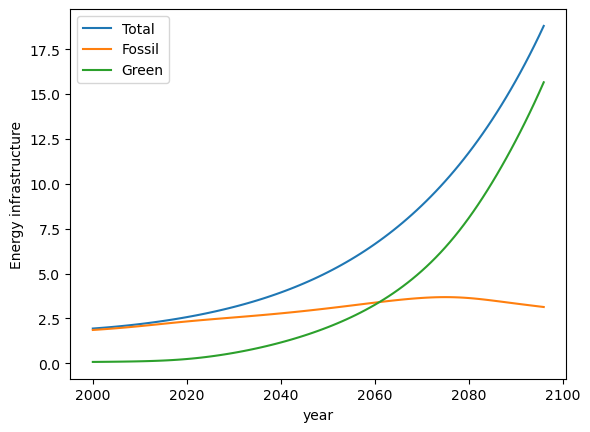

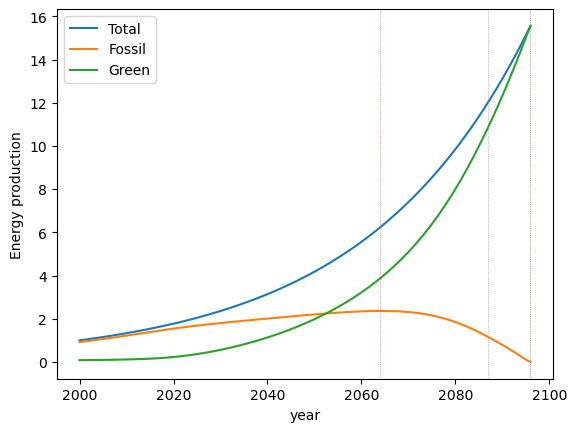

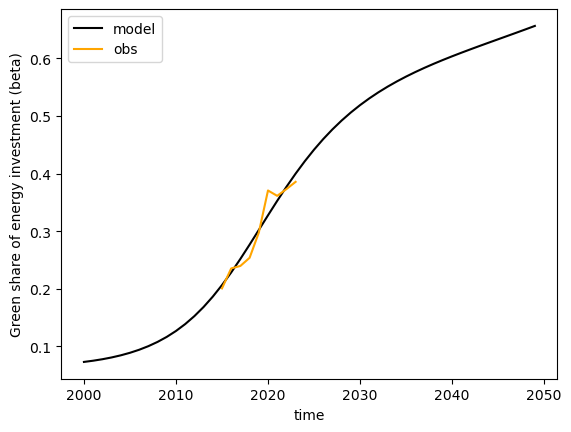

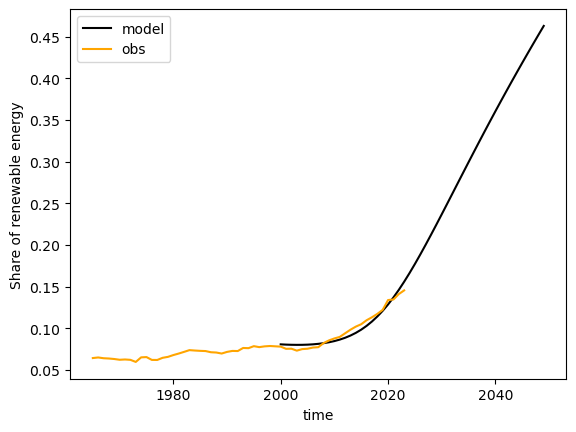

In [107]:
year_ini = 2000

params = lef.default_params.copy()
params['growth'] = 0.029 # fixing Growth!

for par, parval in zip(parnames, result.x):
    params[par] = parval

resu_hist = lef.run_model(inicond = lef.inicond_yr(year_ini), params = params, n_iter = 100, verbose = False, rule = 'maxgreen', year_ini = year_ini)
lef.plot_resu(resu_hist, year_ini = year_ini)
lef.plot_resuvsobs(resu_hist, year_ini = year_ini)

yini = year_ini
#print(yini + resu['year_peak'], yini + resu['year_halved'], yini + resu['year_zero'])

cost = lef.costfun(resu_hist, obs)#, weights = weights)
print(cost)

# Sensitivity on growth

In [85]:
params

{'growth': 0.029,
 'eps': 1,
 'a': 1.0349258370075056,
 'b': 1,
 'gamma_f': 0.5,
 'gamma_g': 0.5,
 'eta_g': 0.2,
 'eta_f': 0.2,
 'h_g': 0.5,
 'h_f': 0.5,
 'r_inv': 0.09992543179352317,
 'beta_0': -0.10588825229722804,
 'delta_sig': 0.15844928501154587,
 'delta_g': 0.01,
 'delta_f': 0.01,
 'f_heavy': 0.1}

In [99]:
reload(lef)

<module 'lib_ecofun' from '/home/fedef/Research/abstractsepapers/papers/DREAM/codes/lib_ecofun.py'>

-----------------------
Growth = 0.0
-----------------------
Growth = 0.01
-----------------------
Growth = 0.02
-----------------------
Growth = 0.03
-----------------------
Growth = 0.04
-----------------------
Growth = 0.05


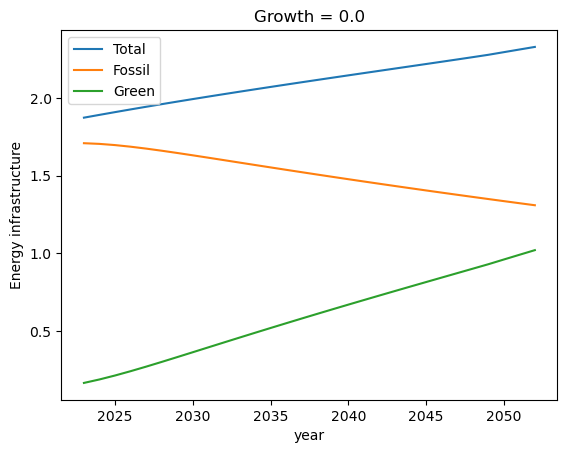

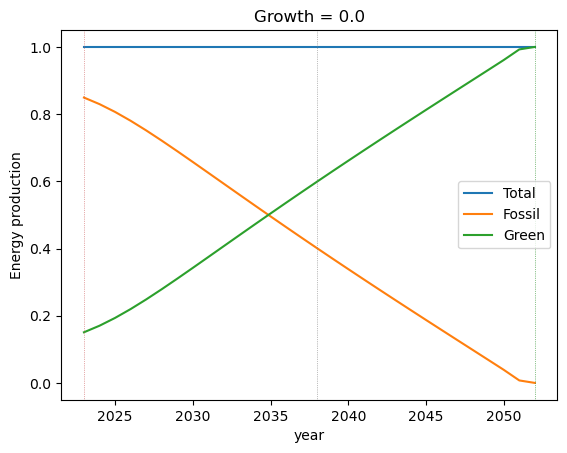

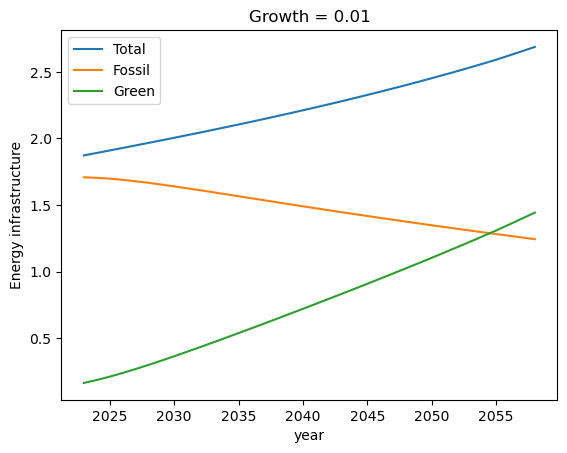

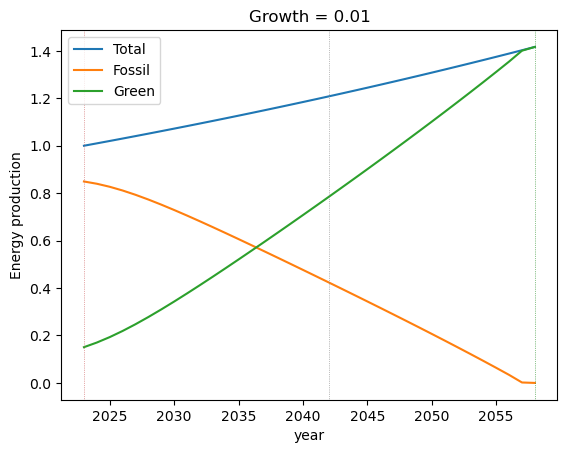

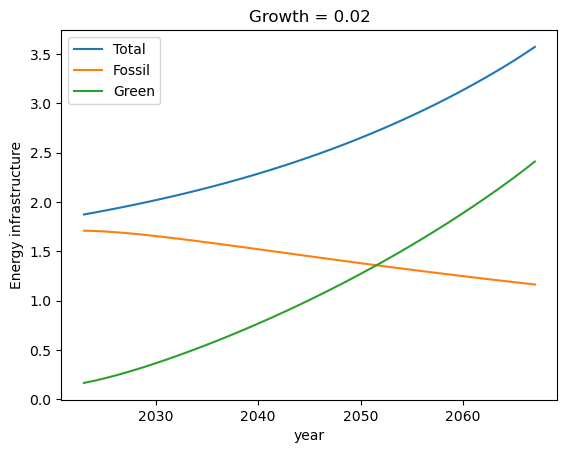

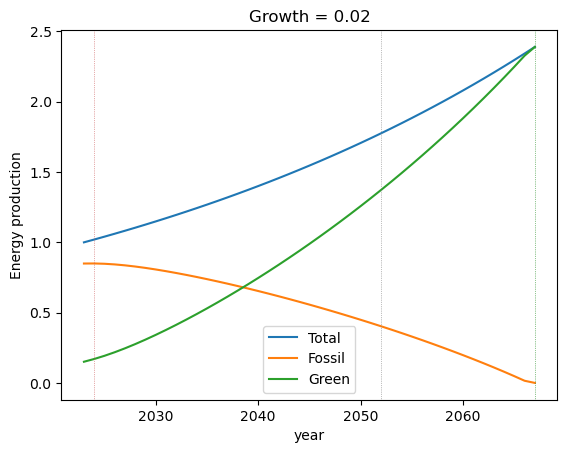

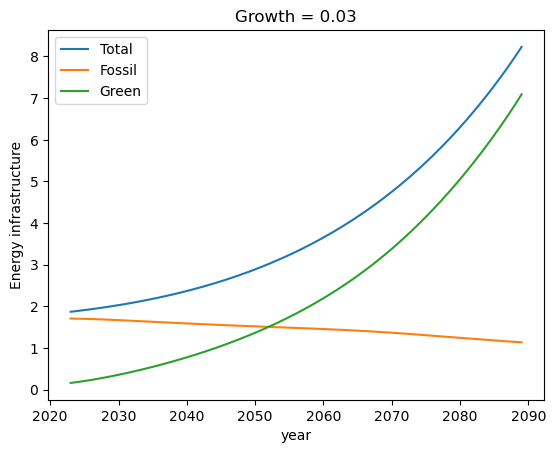

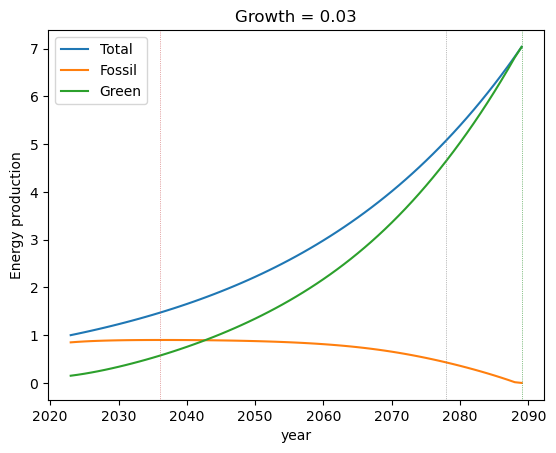

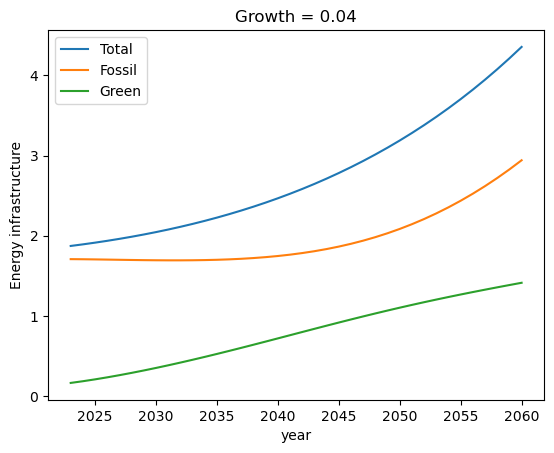

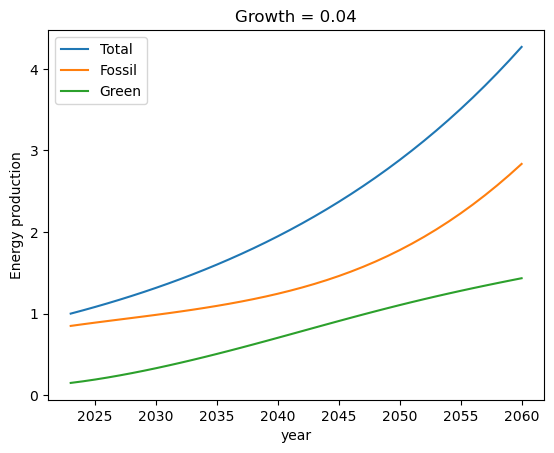

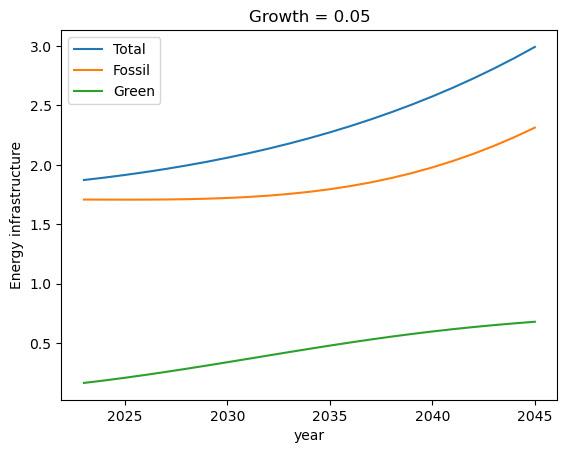

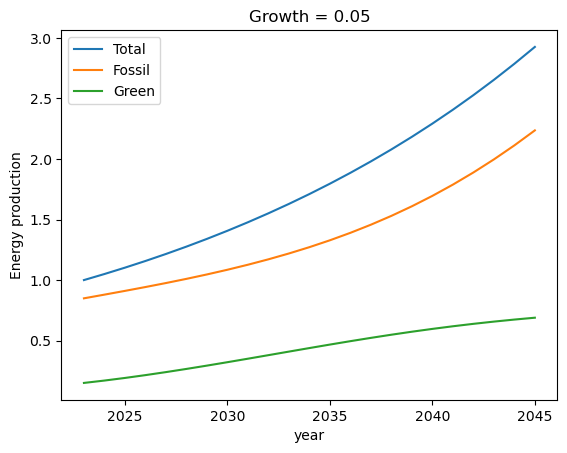

In [108]:
year_ini = 2023
allresu = []

for gro in np.arange(0., 0.06, 0.01):
    params['growth'] = gro
    print('-----------------------')
    print(f'Growth = {gro}')

    resu = lef.run_model(inicond = lef.inicond_yr(year_ini), params = params, n_iter = 100, verbose = False, rule = 'maxgreen', year_ini = year_ini)
    lef.plot_resu(resu, year_ini = year_ini, title = f'Growth = {gro}')
    allresu.append(resu)

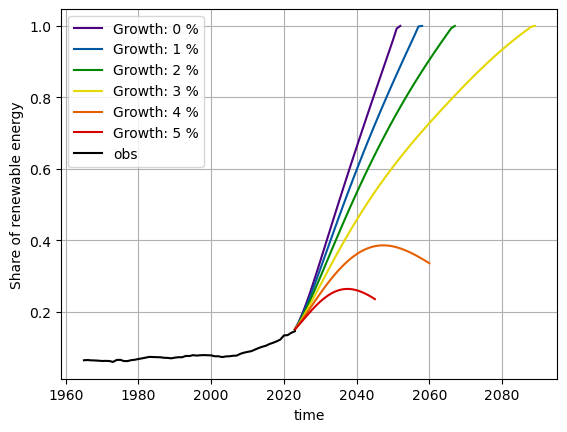

In [116]:
fig = plt.figure()

rainbow_palette = [
    "#D70000",  # Dark Red
    "#E56000",  # Dark Orange
    "#E5D700",  # Gold
    "#008700",  # Dark Green
    "#0057A0",  # Dark Blue
    "#4B0082"   # Indigo (Dark Purple)
]

for gro, re, col in zip(np.arange(0., 0.06, 0.01), allresu, rainbow_palette[::-1]):
    re['Eg_ratio'].plot(label = f'Growth: {int(100*gro)} %', color = col)
   
lef.Eg_ratio.plot(label = 'obs', color = 'black')

plt.xlabel('time')
plt.ylabel('Share of renewable energy')
plt.legend()
plt.grid()